In [1]:
import pandas as pd
import math
import swifter
import re

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\all_landing_location.csv')
df2 = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\preprocessed\all_vehicle_location.csv')

In [3]:
df1

,_D,character.name,character.location.x,character.location.y,item.itemId,whitecircle_location_x,whitecircle_location_y,whitecircle_radius
0,11:21:03.132,TL_Jiaoyang,605780.87500,366935.43750,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1,11:21:06.992,TL_Lzqq,644191.00000,264852.03125,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
2,11:21:09.653,V7_Gyumin,512450.31250,362163.37500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
3,11:21:09.685,V7_Tosi,513454.90625,361667.56250,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
4,11:21:11.753,TL_Shen,564564.31250,298073.90625,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
...,...,...,...,...,...,...,...,...
1147,13:05:02.837,TL_Lzqq,449028.03125,347605.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1148,13:05:03.692,TL_ATongMuu,447457.34375,348624.12500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1149,13:05:04.721,TL_Shen,444380.43750,348159.96875,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1150,13:05:04.788,TL_Jiaoyang,446400.15625,346801.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875


In [4]:
df2

,_D,character.name,character.location.x,character.location.y,vehicle.vehicleType,whitecircle_location_x,whitecircle_location_y,whitecircle_radius
0,11:21:05.326,TL_Jiaoyang,605124.12500,367265.59375,WheeledVehicle,438487.875,245424.515625,203699.6875
1,11:21:11.083,SSG_PiXeL1K,650874.50000,444264.84375,WheeledVehicle,438487.875,245424.515625,203699.6875
2,11:21:12.797,V7_Glaz,556908.56250,358172.84375,WheeledVehicle,438487.875,245424.515625,203699.6875
3,11:21:13.804,LG_M1ME,500659.81250,362428.78125,WheeledVehicle,438487.875,245424.515625,203699.6875
4,11:21:14.681,TL_ATongMuu,643755.25000,260032.34375,WheeledVehicle,438487.875,245424.515625,203699.6875
...,...,...,...,...,...,...,...,...
1144,13:04:26.913,TWIS_Lu,547279.81250,702854.87500,WheeledVehicle,438487.875,245424.515625,203699.6875
1145,13:04:50.623,17_Xbei,464899.84375,364018.31250,WheeledVehicle,438487.875,245424.515625,203699.6875
1146,13:05:36.706,DNW_seoul,627324.12500,149363.06250,WheeledVehicle,438487.875,245424.515625,203699.6875
1147,13:09:36.952,NH_MMing,429388.15625,260608.00000,WheeledVehicle,438487.875,245424.515625,203699.6875


유클리드 거리계산 수식

d= 
(x2−x1) 
2
 +(y2−y1) 
2
 
​


In [5]:
def euclidean_distance(point1, point2):
    # point1과 point2는 각각 (x, y) 형태의 튜플 또는 리스트
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    return distance

#def euclidean_distance(x1, x2, y1, y2):
#    # point1과 point2는 각각 (x, y) 형태의 튜플 또는 리스트
#    distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
#    return distance

In [6]:
# 예제 사용
point_a = (1, 2)
point_b = (4, 6)
distance_ab = euclidean_distance(point_a, point_b)
distance_ab

5.0

In [7]:
df1

,_D,character.name,character.location.x,character.location.y,item.itemId,whitecircle_location_x,whitecircle_location_y,whitecircle_radius
0,11:21:03.132,TL_Jiaoyang,605780.87500,366935.43750,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1,11:21:06.992,TL_Lzqq,644191.00000,264852.03125,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
2,11:21:09.653,V7_Gyumin,512450.31250,362163.37500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
3,11:21:09.685,V7_Tosi,513454.90625,361667.56250,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
4,11:21:11.753,TL_Shen,564564.31250,298073.90625,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
...,...,...,...,...,...,...,...,...
1147,13:05:02.837,TL_Lzqq,449028.03125,347605.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1148,13:05:03.692,TL_ATongMuu,447457.34375,348624.12500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1149,13:05:04.721,TL_Shen,444380.43750,348159.96875,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875
1150,13:05:04.788,TL_Jiaoyang,446400.15625,346801.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875


거리계산 함수 설정

In [8]:
def distance_character_whitecircle(row):

    character_location = (row['character.location.x'], row['character.location.y'])
    circle_location = (row['whitecircle_location_x'], row['whitecircle_location_y'])
    
    distance = euclidean_distance(character_location, circle_location)

    return distance

낙하위치와 첫 원 중심부와의 거리

In [9]:
df1['distance'] = df1.swifter.apply(distance_character_whitecircle, axis=1, result_type='expand')

Pandas Apply:   0%|          | 0/1152 [00:00<?, ?it/s]

In [10]:
df1

,_D,character.name,character.location.x,character.location.y,item.itemId,whitecircle_location_x,whitecircle_location_y,whitecircle_radius,distance
0,11:21:03.132,TL_Jiaoyang,605780.87500,366935.43750,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,206765.209801
1,11:21:06.992,TL_Lzqq,644191.00000,264852.03125,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,206618.498683
2,11:21:09.653,V7_Gyumin,512450.31250,362163.37500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,138196.973372
3,11:21:09.685,V7_Tosi,513454.90625,361667.56250,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,138320.286731
4,11:21:11.753,TL_Shen,564564.31250,298073.90625,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,136628.058706
...,...,...,...,...,...,...,...,...,...
1147,13:05:02.837,TL_Lzqq,449028.03125,347605.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,102722.666831
1148,13:05:03.692,TL_ATongMuu,447457.34375,348624.12500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,103588.661275
1149,13:05:04.721,TL_Shen,444380.43750,348159.96875,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,102904.303222
1150,13:05:04.788,TL_Jiaoyang,446400.15625,346801.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,101684.786369


In [11]:
df1[['character.name','distance']]

,character.name,distance
0,TL_Jiaoyang,206765.209801
1,TL_Lzqq,206618.498683
2,V7_Gyumin,138196.973372
3,V7_Tosi,138320.286731
4,TL_Shen,136628.058706
...,...,...
1147,TL_Lzqq,102722.666831
1148,TL_ATongMuu,103588.661275
1149,TL_Shen,102904.303222
1150,TL_Jiaoyang,101684.786369


In [12]:
df1

,_D,character.name,character.location.x,character.location.y,item.itemId,whitecircle_location_x,whitecircle_location_y,whitecircle_radius,distance
0,11:21:03.132,TL_Jiaoyang,605780.87500,366935.43750,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,206765.209801
1,11:21:06.992,TL_Lzqq,644191.00000,264852.03125,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,206618.498683
2,11:21:09.653,V7_Gyumin,512450.31250,362163.37500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,138196.973372
3,11:21:09.685,V7_Tosi,513454.90625,361667.56250,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,138320.286731
4,11:21:11.753,TL_Shen,564564.31250,298073.90625,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,136628.058706
...,...,...,...,...,...,...,...,...,...
1147,13:05:02.837,TL_Lzqq,449028.03125,347605.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,102722.666831
1148,13:05:03.692,TL_ATongMuu,447457.34375,348624.12500,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,103588.661275
1149,13:05:04.721,TL_Shen,444380.43750,348159.96875,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,102904.303222
1150,13:05:04.788,TL_Jiaoyang,446400.15625,346801.00000,Item_Back_B_01_StartParachutePack_C,438487.875,245424.515625,203699.6875,101684.786369


In [13]:
df1['character.name'].unique()

array(['TL_Jiaoyang', 'TL_Lzqq', 'V7_Gyumin', 'V7_Tosi', 'TL_Shen',
       'V7_Glaz', 'LG_M1ME', 'V7_Heaven', 'TL_ATongMuu', 'CES_HaiSaki',
       'LG_Snakers', 'CES_Taikonn', 'FaZe_curexi', 'LG_Fludd', 'LG_Relo',
       'CES_Himass', 'SQ_Kickstart', 'PeRo_Aixleft', 'TWIS_spyrro',
       'SQ_TGLTN', 'TWIS_Lu', 'TWIS_BatulinS', 'PeRo_Summer',
       'TWIS_Perfect1ks', 'SQ_hwinn', '17_Xbei', 'T5_RossitedJR',
       'T5_Pathompong', '17_xwudd', 'SQ_Shrimzy', 'PeRo_Cui71',
       'CES_Sololzy', 'Tian_77owo', 'DNW_Salute', 'GEN_Pio', 'FaZe_Fexx',
       'T5_Thanad0l', 'GEN_DG98', 'NH_MMing', 'FaZe_jeemzz', 'PeRo_Ming',
       '17_Lilghost', 'Tian_LinShu23', 'Tian_Zyy', 'NH_Dec12th',
       'GEN_Esther', 'Tian_PaoPao', 'DAY_Nourinz', 'NH_Nannnnn',
       'T5_Hatsawat', 'GEN_Seongjang', 'NH_CC108', '17_SuJiu', 'DNW_Loki',
       'FaZe_Gustav', 'DNW_seoul', 'DAY_Flash', 'DAY_PuuChiwz',
       'DAY_Belmoth', 'DNW_Inonix', 'SSG_PaG3', 'SSG_Roth',
       'SSG_Sharpshot4K', 'SSG_PiXeL1K'], dtype=o

In [14]:
# 특정 열의 데이터 처리
df1['character.name'] = df1['character.name'].apply(lambda x: x.split('_')[0])

# 결과 확인
print(df1)

                _D character.name  character.location.x  character.location.y  \
0     11:21:03.132             TL          605780.87500          366935.43750   
1     11:21:06.992             TL          644191.00000          264852.03125   
2     11:21:09.653             V7          512450.31250          362163.37500   
3     11:21:09.685             V7          513454.90625          361667.56250   
4     11:21:11.753             TL          564564.31250          298073.90625   
...            ...            ...                   ...                   ...   
1147  13:05:02.837             TL          449028.03125          347605.00000   
1148  13:05:03.692             TL          447457.34375          348624.12500   
1149  13:05:04.721             TL          444380.43750          348159.96875   
1150  13:05:04.788             TL          446400.15625          346801.00000   
1151  13:10:36.267           Tian          379204.81250          392276.21875   

                           

In [15]:
team_land_distance = df1.groupby('character.name')['distance'].sum()
team_land_distance

character.name
17      1.249632e+07
CES     1.739979e+07
DAY     2.178857e+07
DNW     1.382315e+07
FaZe    1.510101e+07
GEN     1.522744e+07
LG      1.582540e+07
NH      1.593365e+07
PeRo    1.526083e+07
SQ      1.692129e+07
SSG     1.586270e+07
T5      1.616958e+07
TL      1.768918e+07
TWIS    1.296598e+07
Tian    1.576627e+07
V7      1.202580e+07
Name: distance, dtype: float64

In [16]:
team_land_distance_DIC = team_land_distance.to_dict()
print(team_land_distance)

character.name
17      1.249632e+07
CES     1.739979e+07
DAY     2.178857e+07
DNW     1.382315e+07
FaZe    1.510101e+07
GEN     1.522744e+07
LG      1.582540e+07
NH      1.593365e+07
PeRo    1.526083e+07
SQ      1.692129e+07
SSG     1.586270e+07
T5      1.616958e+07
TL      1.768918e+07
TWIS    1.296598e+07
Tian    1.576627e+07
V7      1.202580e+07
Name: distance, dtype: float64


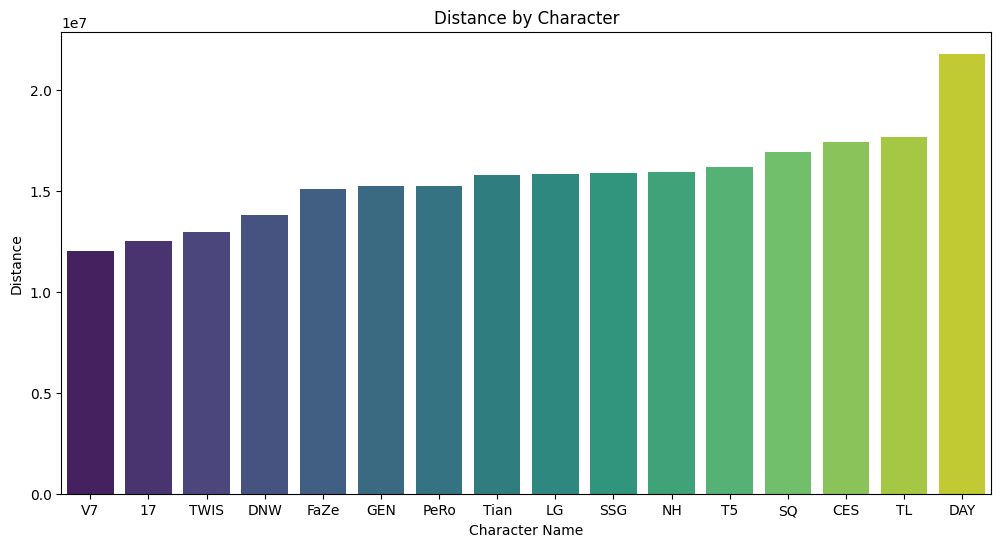

In [17]:
# 딕셔너리를 데이터프레임으로 변환
df_plot = pd.DataFrame(list(team_land_distance_DIC.items()), columns=['character.name', 'distance'])
df_plot = df_plot.sort_values(by='distance')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='character.name', y='distance', data=df_plot, palette='viridis')
plt.title('Distance by Character')
plt.xlabel('Character Name')
plt.ylabel('Distance')
plt.show()

첫 탑승위치와 첫 원 중심부와의 거리

In [18]:
df2['distance'] = df2.swifter.apply(distance_character_whitecircle, axis=1, result_type='expand')

Pandas Apply:   0%|          | 0/1149 [00:00<?, ?it/s]

In [19]:
df2

,_D,character.name,character.location.x,character.location.y,vehicle.vehicleType,whitecircle_location_x,whitecircle_location_y,whitecircle_radius,distance
0,11:21:05.326,TL_Jiaoyang,605124.12500,367265.59375,WheeledVehicle,438487.875,245424.515625,203699.6875,206428.893648
1,11:21:11.083,SSG_PiXeL1K,650874.50000,444264.84375,WheeledVehicle,438487.875,245424.515625,203699.6875,290939.090821
2,11:21:12.797,V7_Glaz,556908.56250,358172.84375,WheeledVehicle,438487.875,245424.515625,203699.6875,163510.381086
3,11:21:13.804,LG_M1ME,500659.81250,362428.78125,WheeledVehicle,438487.875,245424.515625,203699.6875,132496.596133
4,11:21:14.681,TL_ATongMuu,643755.25000,260032.34375,WheeledVehicle,438487.875,245424.515625,203699.6875,205786.500728
...,...,...,...,...,...,...,...,...,...
1144,13:04:26.913,TWIS_Lu,547279.81250,702854.87500,WheeledVehicle,438487.875,245424.515625,203699.6875,470189.556820
1145,13:04:50.623,17_Xbei,464899.84375,364018.31250,WheeledVehicle,438487.875,245424.515625,203699.6875,121499.303498
1146,13:05:36.706,DNW_seoul,627324.12500,149363.06250,WheeledVehicle,438487.875,245424.515625,203699.6875,211865.363121
1147,13:09:36.952,NH_MMing,429388.15625,260608.00000,WheeledVehicle,438487.875,245424.515625,203699.6875,17701.499346


In [20]:
# 특정 열의 데이터 처리
df2['character.name'] = df2['character.name'].apply(lambda x: x.split('_')[0])

team_ride_distance = df2.groupby('character.name')['distance'].sum()
team_ride_distance

team_ride_distance_DIC = team_ride_distance.to_dict()
print(team_ride_distance_DIC)

{'17': 12618679.255513988, 'CES': 17474285.726486728, 'DAY': 23046754.93164125, 'DNW': 13794821.448257497, 'FaZe': 14102368.878795115, 'GEN': 15481052.215430336, 'LG': 15784198.884978576, 'NH': 17117141.436795432, 'PeRo': 14378956.43993481, 'SQ': 15584601.983664319, 'SSG': 16945869.37335232, 'T5': 14051750.614829231, 'TL': 20488503.3951058, 'TWIS': 13082727.27179614, 'Tian': 14354094.934096757, 'V7': 11168889.503706943}


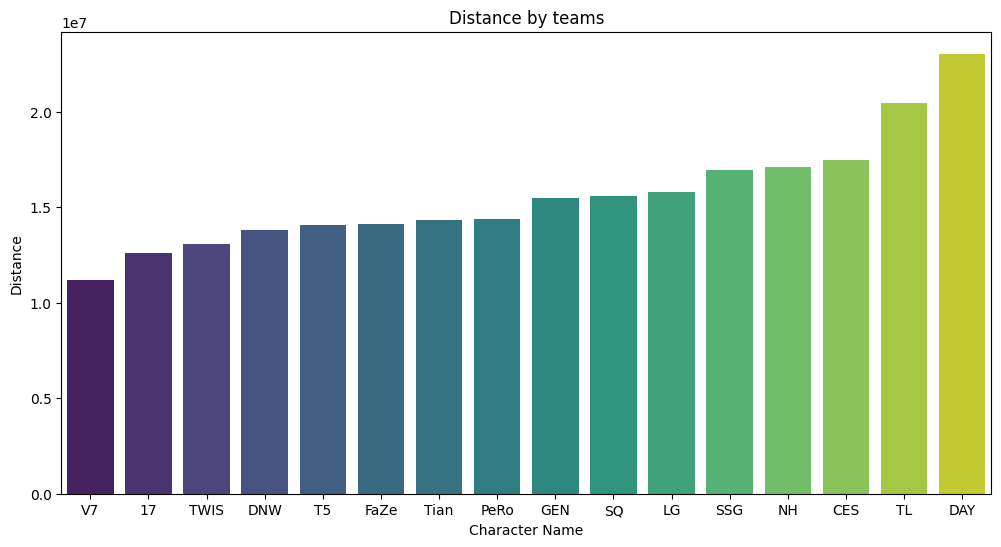

In [21]:
# 딕셔너리를 데이터프레임으로 변환
df2_plot = pd.DataFrame(list(team_ride_distance_DIC.items()), columns=['character.name', 'distance'])
df2_plot = df2_plot.sort_values(by='distance')

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(x='character.name', y='distance', data=df2_plot, palette='viridis')
plt.title('Distance by teams')
plt.xlabel('Character Name')
plt.ylabel('Distance')
plt.show()

같이 표현하기

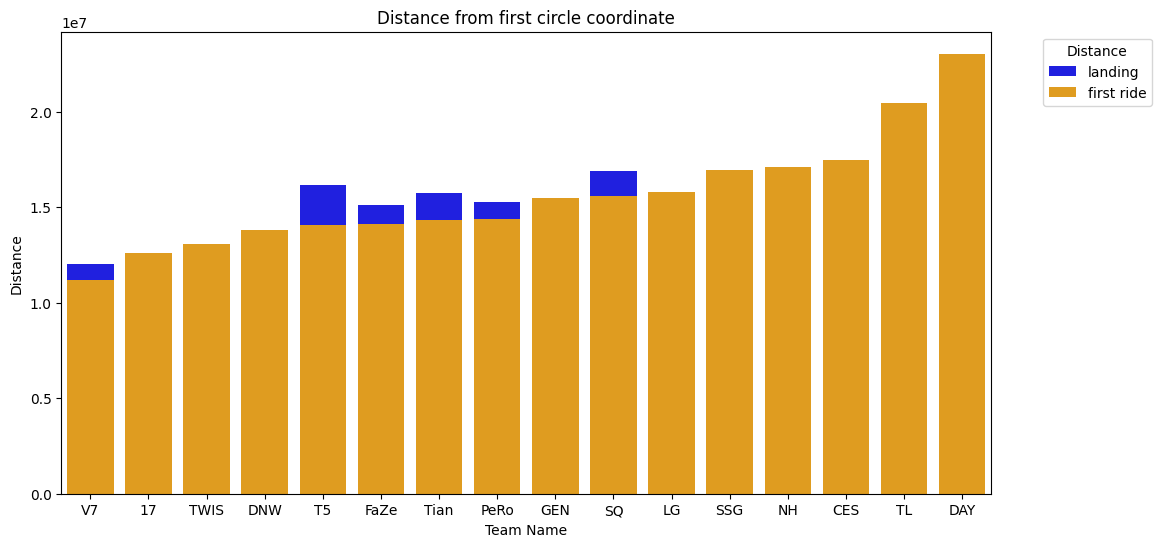

In [22]:
# 딕셔너리를 데이터프레임으로 변환
df_plot = pd.DataFrame(list(team_land_distance_DIC.items()), columns=['character.name', 'distance'])

# 두 번째 데이터프레임 생성 (예시로 같은 데이터 사용)
df_plot2 = pd.DataFrame(list(team_ride_distance_DIC.items()), columns=['character.name', 'distance'])

# 'character.name' 열을 기준으로 데이터프레임 정렬
df_plot = df_plot.sort_values(by='character.name')
df_plot2 = df_plot2.sort_values(by='character.name')

# 두 데이터프레임을 합치기
merged_df = pd.merge(df_plot, df_plot2, on='character.name', suffixes=('_Landing', '_FirstRide'))
merged_df = merged_df.sort_values(by='distance_FirstRide')

# 그래프 그리기
plt.figure(figsize=(12, 6))

sns.barplot(x='character.name', y='distance_Landing', data=merged_df, color='blue', label='landing')
sns.barplot(x='character.name', y='distance_FirstRide', data=merged_df, color='orange', label='first ride')
plt.title('Distance from first circle coordinate')
plt.xlabel('Team Name')
plt.ylabel('Distance')
plt.legend(title='Distance', loc='upper right', bbox_to_anchor=(1.18, 1))

# 이미지 저장
output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\first_land_ride.png'
plt.savefig(output_path, bbox_inches='tight')
plt.show()

In [23]:
merged_df

,character.name,distance_Landing,distance_FirstRide
15,V7,1.202580e+07,1.116889e+07
0,17,1.249632e+07,1.261868e+07
13,TWIS,1.296598e+07,1.308273e+07
3,DNW,1.382315e+07,1.379482e+07
11,T5,1.616958e+07,1.405175e+07
4,FaZe,1.510101e+07,1.410237e+07
14,Tian,1.576627e+07,1.435409e+07
8,PeRo,1.526083e+07,1.437896e+07
5,GEN,1.522744e+07,1.548105e+07
9,SQ,1.692129e+07,1.558460e+07


In [24]:
team_land_distance = df1.groupby('character.name')['distance'].sum().to_frame()
team_land_distance = team_land_distance.reset_index()
team_land_distance = team_land_distance.rename(columns={'character.name' : 'team_name'})


In [25]:
team_land_distance

,team_name,distance
0,17,1.249632e+07
1,CES,1.739979e+07
2,DAY,2.178857e+07
3,DNW,1.382315e+07
4,FaZe,1.510101e+07
5,GEN,1.522744e+07
6,LG,1.582540e+07
7,NH,1.593365e+07
8,PeRo,1.526083e+07
9,SQ,1.692129e+07


In [26]:
total_match_stat = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\total_match_stat.csv')
total_match_stat

,Unnamed: 0.1,Unnamed: 0,team_name,damageDealt,killPlace,timeSurvived,walkDistance,Total PO,distance
0,0,0,DNW,285.914052,27.583333,1394.541667,1456.325344,137,1.382315e+07
1,1,1,TWIS,243.097178,29.986111,1362.375000,1284.680308,125,1.296598e+07
2,2,2,CES,240.556303,30.986111,1313.944444,1471.418439,109,1.739979e+07
3,3,3,FaZe,210.429910,30.888889,1205.083333,1184.700705,113,1.510101e+07
4,4,4,PeRo,207.871021,33.833333,1178.027778,1109.692602,119,1.526083e+07
5,5,5,LG,207.066743,34.333333,1247.402778,1037.285907,102,1.582540e+07
6,6,6,T5,203.046201,38.805556,1260.319444,1063.065418,75,1.616958e+07
7,7,7,Tian,199.398794,29.916667,1226.416667,1003.694852,100,1.576627e+07
8,8,8,V7,197.078157,37.263889,1117.458333,1065.732370,99,1.202580e+07
9,9,9,17,196.300448,29.736111,1396.930556,1080.965781,133,1.249632e+07


In [27]:
total_match_stat.drop(['distance_x'], axis = 1, inplace = True)

KeyError: "['distance_x'] not found in axis"

In [28]:
total_match_stat
total_match_stat_all = total_match_stat

In [ ]:
total_match_stat.drop(['distance_y'], axis = 1, inplace = True)

In [29]:
total_match_stat_all.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [31]:
total_match_stat_all.drop(['Unnamed: 0.1'], axis = 1, inplace = True)
total_match_stat_all

,team_name,damageDealt,killPlace,timeSurvived,walkDistance,Total PO,distance
0,DNW,285.914052,27.583333,1394.541667,1456.325344,137,1.382315e+07
1,TWIS,243.097178,29.986111,1362.375000,1284.680308,125,1.296598e+07
2,CES,240.556303,30.986111,1313.944444,1471.418439,109,1.739979e+07
3,FaZe,210.429910,30.888889,1205.083333,1184.700705,113,1.510101e+07
4,PeRo,207.871021,33.833333,1178.027778,1109.692602,119,1.526083e+07
5,LG,207.066743,34.333333,1247.402778,1037.285907,102,1.582540e+07
6,T5,203.046201,38.805556,1260.319444,1063.065418,75,1.616958e+07
7,Tian,199.398794,29.916667,1226.416667,1003.694852,100,1.576627e+07
8,V7,197.078157,37.263889,1117.458333,1065.732370,99,1.202580e+07
9,17,196.300448,29.736111,1396.930556,1080.965781,133,1.249632e+07


In [32]:
total_match_stat_all

total_match_stat_all.to_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\total_match_stat.csv')

In [33]:
import pandas as pd
data = pd.read_csv(r'C:\Users\PC\Desktop\AI_Lab\pubg\total_match_stat.csv')

In [34]:
#쥬피터노트북에서 이미지 표시가능하게 하는 쥬피터노트북 매직함수
%matplotlib inline

In [35]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [36]:
team_list = total_match_stat_all['team_name'].to_list()
print(team_list)

['DNW', 'TWIS', 'CES', 'FaZe', 'PeRo', 'LG', 'T5', 'Tian', 'V7', '17', 'NH', 'SQ', 'DAY', 'SSG', 'TL', 'GEN']


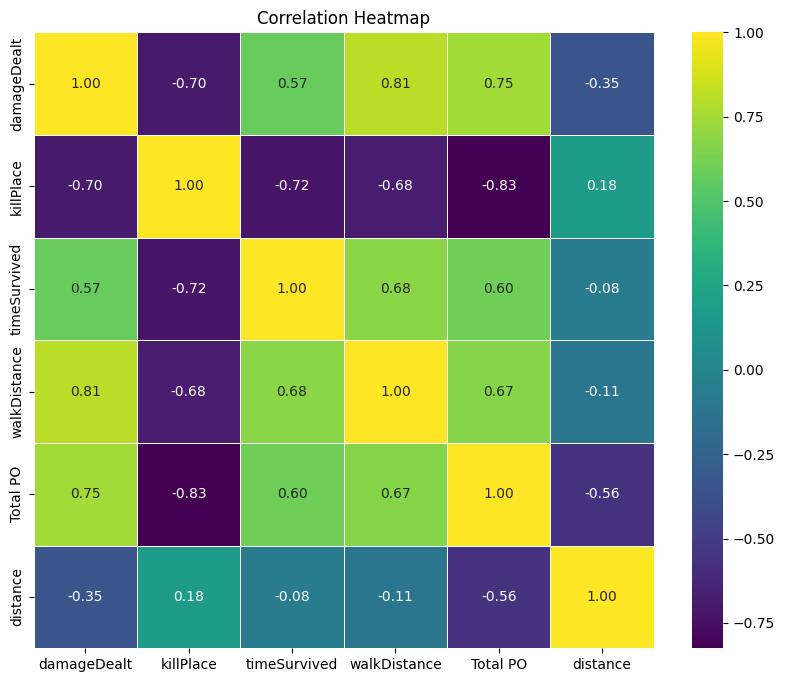

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df=total_match_stat_all

# 'team_name' 열 제거
df_numeric = df.drop('team_name', axis=1)

# 상관관계 행렬 생성
correlation_matrix = df_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

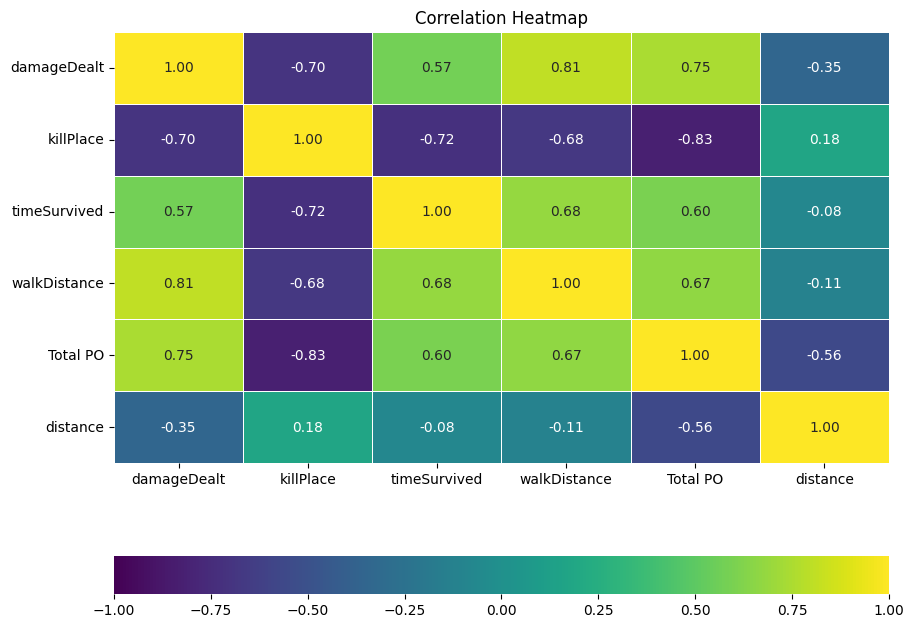

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = total_match_stat_all

# 'team_name' 열 제거
df_numeric = df.drop('team_name', axis=1)

# 상관관계 행렬 생성
correlation_matrix = df_numeric.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
plt.rcParams['axes.facecolor'] = 'black'
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={"orientation": "horizontal"}, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\Correlation Heatmap.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# import pandas as pd

# df = total_match_stat_all

# # 'team_name' 열 제거
# df_numeric = df.drop('team_name', axis=1)

# # 상관관계 행렬 생성
# correlation_matrix = df_numeric.corr()

# # 히트맵 그리기
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5, cbar_kws={"orientation": "horizontal"}, vmin=-1, vmax=1)

# output_path = r'C:\Users\PC\Desktop\AI_Lab\pubg\figure\Correlation Heatmap.png'
# plt.savefig(output_path, bbox_inches='tight')

# plt.title('Correlation Heatmap')
# plt.show()